### Importing neccessary libary

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score, classification_report
from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.preprocessing import StandardScaler



### Imoporting data from `ucimlrepo`

In [4]:

# fetch dataset 
automobile = fetch_ucirepo(id=10) 
  
# data (as pandas dataframes) 
X = automobile.data.features 
y = automobile.data.targets 
  
# metadata 
print(automobile.metadata) 
  
# variable information 
print(automobile.variables) 

{'uci_id': 10, 'name': 'Automobile', 'repository_url': 'https://archive.ics.uci.edu/dataset/10/automobile', 'data_url': 'https://archive.ics.uci.edu/static/public/10/data.csv', 'abstract': "From 1985 Ward's Automotive Yearbook", 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 205, 'num_features': 25, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['symboling'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1985, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5B01C', 'creators': ['Jeffrey Schlimmer'], 'intro_paper': None, 'additional_info': {'summary': 'This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.  The second rating corresponds to the degree to which th

In [5]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
concrete_compressive_strength = fetch_ucirepo(id=165) 
  
# data (as pandas dataframes) 
X = concrete_compressive_strength.data.features
y = concrete_compressive_strength.data.targets 
  
# metadata 
print(concrete_compressive_strength.metadata) 
  
# variable information 
print(concrete_compressive_strength.variables) 


{'uci_id': 165, 'name': 'Concrete Compressive Strength', 'repository_url': 'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength', 'data_url': 'https://archive.ics.uci.edu/static/public/165/data.csv', 'abstract': 'Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. ', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1030, 'num_features': 8, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Concrete compressive strength'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sun Feb 11 2024', 'dataset_doi': '10.24432/C5PK67', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'title': 'Modeling of strength of high-performance concrete using artificial neural networks', 'authors': 'I. Yeh', 'published_in': 'Cement and Concrete Res

In [6]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = concrete_compressive_strength.data.features 
y = concrete_compressive_strength.data.targets 
  
# metadata 
print(abalone.metadata) 
  
# variable information 
print(abalone.variables) 


{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

### EDA

In [7]:
# Fetch dataset
# automobile = fetch_ucirepo(id=10)

In [8]:
# Convert features and targets to numeric values
features_df = pd.DataFrame(concrete_compressive_strength.data.features)
targets_df = pd.DataFrame(concrete_compressive_strength.data.targets)

targets_df.head(10)

,Concrete compressive strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30
5,47.03
6,43.70
7,36.45
8,45.85
9,39.29


In [9]:
# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Fit the scaler to the data and transform it
# features_df = pd.DataFrame(scaler.fit_transform(features_df))
# targets_df = pd.DataFrame(scaler.fit_transform(targets_df))
# features_df.head(10)

# targets_df

### Convert data to numberic numbers

In [10]:
X = features_df.apply(pd.to_numeric, errors='coerce').dropna(axis=1)

threshold = 50
y = (targets_df.apply(pd.to_numeric, errors='coerce').fillna(0) > threshold).astype(int)


X.head(10)

# len(X)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28


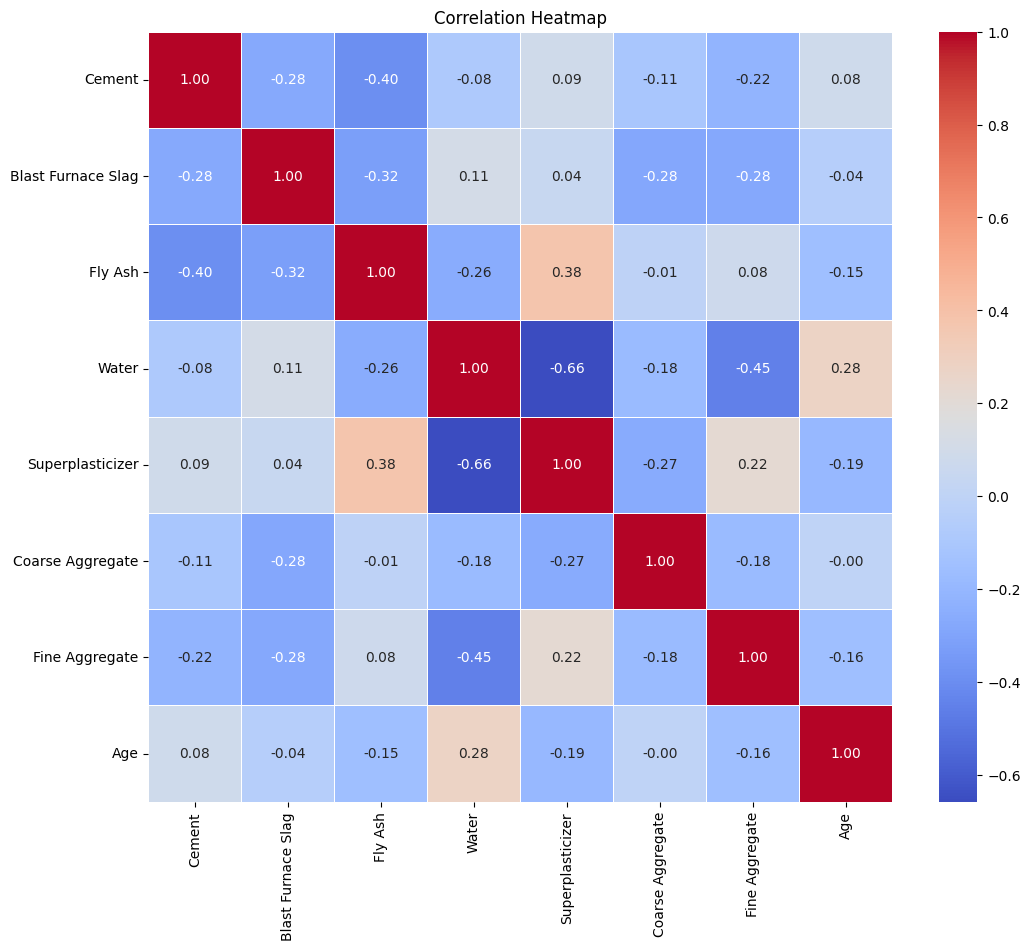

In [11]:
corr_matrix = X.corr()


# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Remove Highly correlated data

In [12]:
# # Remove features with correlation higher than 0.65
# high_correlation_features = corr_matrix[abs(corr_matrix) > 0.8]
# high_correlation_features = high_correlation_features.stack().reset_index()
# high_correlation_features = high_correlation_features[high_correlation_features['level_0'] != high_correlation_features['level_1']]
# high_correlation_features

In [13]:
# features_to_remove = ['city-mpg', 'engine-size', 'width', 'length','height', 'wheel-base']
# # Drop features with high correlation
# df_filtered = X.drop(columns=features_to_remove)

# df_filtered.head(10)

### Split data into training and testing sets

In [49]:
# X = df_filtered
# X = df_filtered.values
# y = y.values
# X_plot = X_plot.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# X_test

In [15]:
# X_train
# y_test.shape
# X_test.shape

In [50]:
# Define kernel
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

kernel  = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))

kernel

1**2 * RBF(length_scale=1)

In [17]:
# np.random.seed(0)
# n=50
 
# kernel_ =[kernels.RBF (),
 
#          kernels.RationalQuadratic(),
 
#          kernels.ExpSineSquared(periodicity=10.0),
 
#          kernels.Matern()
#          ]
# print(kernel_, '\n')

# kernel_

In [51]:
n_restarts_optimizer = 9
# for kernel in kernel_:
# Train Gaussian Process
gpc_model = GaussianProcessClassifier(kernel=kernel, n_restarts_optimizer=10, random_state=42)
gpc_model.fit(X_train, y_train)

X_test_copy = X_test.copy()
X_test_copy.reset_index(drop=True, inplace=True)

y_test_copy = y_test.copy()
y_test_copy.reset_index(drop=True, inplace=True)


# Make predictions on the test set
y_pred = gpc_model.predict(X_test)

# Evaluate the model using accuracy score and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred))




# Plot the classification results (if applicable based on the number of classes in y)
# Example plot: scatter plot of predicted vs. actual classes
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, c='blue', label='Actual Classes', marker='.')
plt.scatter(range(len(y_pred)), y_pred, c='red', label='Predicted Classes', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Gaussian Process Classification Results')
plt.legend()
plt.show()


In [34]:
print(X_test.shape)

Z = X_test.values.reshape(2)

(206, 8)


ValueError: cannot reshape array of size 1648 into shape (2,)

(206,)


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not       Concrete compressive strength
0                                 1
1                                 1
2                                 0
3                                 0
4                                 0
...                             ...
1025                              0
1026                              0
1027                              0
1028                              0
1029                              0

[1030 rows x 1 columns]

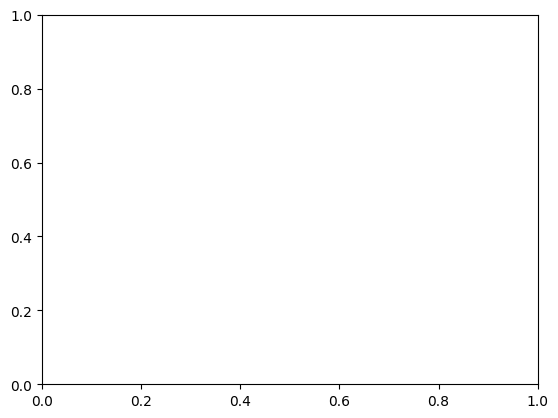

Accuracy Score: 0.835
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       100
           1       0.85      0.81      0.83       100

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200



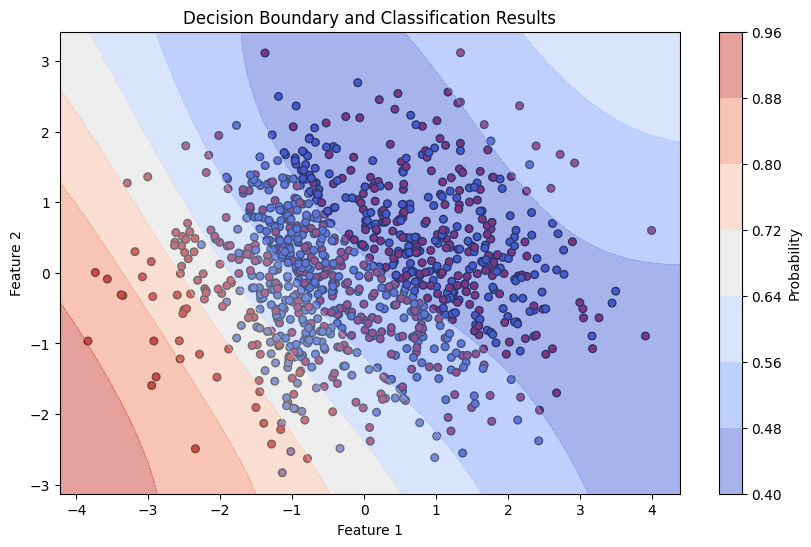

In [48]:

# Selecting two features for decision boundary visualization
feature1_index = 0  # Index of the first feature
feature2_index = 1  # Index of the second feature

# Plot data points
plt.figure(figsize=(10, 6))
plt.scatter(X[:, feature1_index], X[:, feature2_index], c=y, cmap='coolwarm', edgecolors='k', s=30)

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                        np.linspace(ylim[0], ylim[1], 50))

# Using only two features for decision boundary prediction
Z = gpc_model.predict_proba(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()),
                                   np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()),
                                   np.zeros_like(xx.ravel())])[:, 1]
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
plt.colorbar(label='Probability')

plt.xlabel(f'Feature {feature1_index + 1}')
plt.ylabel(f'Feature {feature2_index + 1}')
plt.title('Decision Boundary and Classification Results')
plt.show()

In [46]:
X_test

array([[-1.44941246, -2.37899611],
       [ 2.61710091,  2.55423179],
       [ 0.29692654,  0.6403844 ],
       [-0.25609413, -0.19628257],
       [ 0.65744896, -1.12829525],
       [-0.76286568, -0.50283777],
       [ 0.53935411,  1.31007519],
       [-0.43610338,  0.92507389],
       [ 0.47568782, -0.76655149],
       [-0.4535553 ,  0.7631217 ],
       [ 1.76365307,  1.75580069],
       [ 2.09260324, -1.47835413],
       [-0.08601345, -0.055715  ],
       [ 1.45226134,  1.46210055],
       [ 0.72756284,  2.72811163],
       [ 0.30996695,  1.38897924],
       [ 1.32562619,  1.33361742],
       [-0.78481488, -0.14495715],
       [ 1.40263629, -0.27001271],
       [ 1.2282757 , -0.75448375],
       [ 2.17442773,  1.83923801],
       [-1.60771127,  1.56995261],
       [-0.55525346,  1.80378347],
       [ 0.51632804,  0.35050646],
       [ 0.25950898,  0.0810298 ],
       [ 1.72877156, -0.82340675],
       [-1.13670048, -1.73197353],
       [ 0.40025977, -1.19589894],
       [ 1.72965545,

In [ ]:
# X_test_copy = X_test.copy()
# X_test_copy.reset_index(drop=True, inplace=True)

# y_test_copy = y_test.copy()
# y_test_copy.reset_index(drop=True, inplace=True)

In [ ]:
# from scipy.stats import chi2

# # Predict on testing data
# y_pred, std = gaussian_process.predict(X_test_copy, return_std=True)

# # Compute Mahalanobis distance for each data point
# residuals = y_test - y_pred
# mahalanobis_dist = np.sqrt(np.diag(np.dot(np.dot(residuals, np.linalg.inv(cov)), residuals.T)))

# # Compute critical value for 95% confidence interval
# df = X_train.shape[1]  # Degrees of freedom
# alpha = 0.05  # Significance level
# critical_value = chi2.ppf(1 - alpha, df)

# # Check if data falls within 95% confidence interval
# within_confidence_interval = mahalanobis_dist < np.sqrt(critical_value)

# print("Mahalanobis Distance:", mahalanobis_dist)
# print("Critical Value:", np.sqrt(critical_value))
# print("Within Confidence Interval:", within_confidence_interval)

In [ ]:
# # Visualize predictions and uncertainty
# plt.figure(figsize=(10, 6))
# plt.plot(y_test_copy.index, y_test_copy, c='b', label="original")
# plt.scatter(y_test_copy.index, y_pred, c='r', label="predicted")
# plt.fill_between(
#         y_test_copy.index,
#         y_pred - 1.96 * std,
#         y_pred + 1.96 * std,
#         alpha=0.5,
#         label="95% condidence interval",
#         color="tab:green",
#     )
# plt.xlabel("True Output")
# plt.ylabel("Predicted Output")
# plt.title("GPR Predictions and Uncertainty")
# plt.legend()
# plt.show()


In [ ]:
# # Visualize predictions and uncertainty
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test_copy, y_pred, c='b', label="Predictions")
# plt.errorbar(y_test_copy, y_pred, yerr=2 * np.sqrt(np.diag(cov)), fmt='o', alpha=0.5, label="95% Confidence Interval")
# plt.plot([min(y_test_copy), max(y_test_copy)], [min(y_test_copy), max(y_test_copy)], '--', c='r', label="Ideal")
# plt.xlabel("True Output")
# plt.ylabel("Predicted Output")
# plt.title("GPR Predictions and Uncertainty")
# plt.legend()
# plt.show()



In [ ]:
# y_pred

# samples_prior = gaussian_process.sample_y(X_test_copy, 3)
# samples_prior

In [ ]:
# # Loop through all features and plot
# for feature in X_test_copy.columns:
#     # plt.plot(X_test_copy[feature], y_test_copy, label="$f(x) = sinc(x)$", linestyle="dotted")
    
#     # plt.plot(X_test_copy[feature], samples_prior, '--')
#     plt.scatter(X_test_copy[feature], y_test_copy, c='b', label="Observation")
#     plt.errorbar(
#         y_test_copy.index,
#         y_test_copy.iloc[:, 0],
#         std,
#         linestyle="None",
#         color="tab:red",
#         marker=".",
#         markersize=10,
#         label="error",
#     )
#     plt.scatter(X_test_copy[feature], y_pred, c='r', label="prediction")
#     plt.fill_between(
#         y_test_copy.index,
#         y_pred - 1.96 * std,
#         y_pred + 1.96 * std,
#         alpha=0.5,
#         label="95% condidence interval",
#         color="tab:green",
#     )

#     plt.legend()
#     plt.xlabel(f"${feature}$")
#     plt.ylabel("$target$")
#     plt.show()

In [ ]:
# X_test_copy = X_test.copy()
# X_test_copy.reset_index(drop=True, inplace=True)

# X_test_copy


In [ ]:
# # Evaluate model
# y_pred, std = gaussian_process.predict(X_test_copy, return_std=True)

# mse = mean_squared_error(y_pred, std)
# mae = mean_absolute_error(y_pred, std)
# print("Mean Squared Error:", mse)
# print("Mean Absolute Error:", mae)

# std



In [ ]:
# # Loop through all features and plot
# for feature in X.columns:
#     plt.figure(figsize=(10, 6))
#     plt.scatter(X_test_copy.index, X_test_copy[feature], c='r', label="Data")
#     plt.plot(X_test_copy.index, y_pred, label="Prediction")
#     plt.fill_between(X_test_copy.index, y_pred - 1.96 * std, y_pred + 1.96 * std, alpha=0.2, label="95% Confidence Interval")
#     plt.xlabel(feature)
#     plt.ylabel("Output")
#     plt.title(f"Gaussian Process Regression with Multiple Inputs ({feature})")
#     plt.legend()
#     plt.show()